In [1]:
import os
os.chdir('/home/bohdan/studies/sem8/mpr/mpr/lab1/')

In [2]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import seaborn as sns


In [7]:
measurement_step = 10000
f"""
Files containing send durations in experiments with each row corresponding to datasize {measurement_step} * row_number Bytes
"""
measurements_files = ['one_node_send.txt', 'one_node_bsend.txt', 'two_nodes_send.txt', 'two_nodes_bsend.txt']
# measured_times = np.array([np.fromfile(m, dtype=float, count=-1, sep='\n', offset=0) for m in measurements_files])
# sent_bytes = np.arange(1, measured_times.shape[0] * measurement_step, measurement_step)
# sent_mbits = (sent_bytes * 8) / 1e6

/tmp/ipykernel_16623/1965409209.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  measured_times = np.array([np.fromfile(m, dtype=float, count=-1, sep='\n', offset=0) for m in measurements_files])


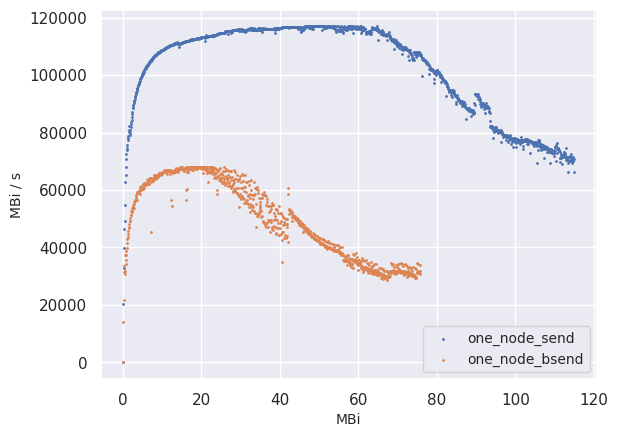

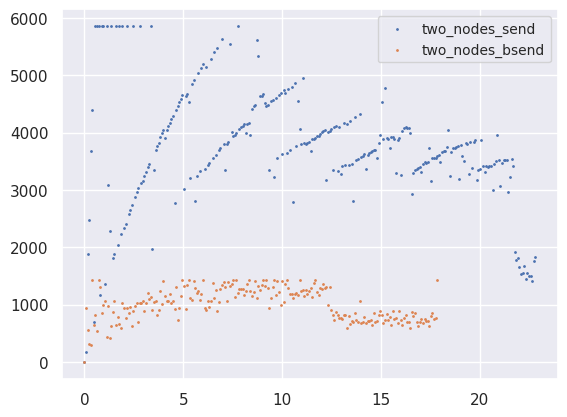

In [14]:
sns.set_theme(style="darkgrid")
font = {'size' : 10 }
matplotlib.rc('font', **font)
plt.xlabel('MBi')
plt.ylabel('MBi / s')

for label in ['one_node_send.txt', 'one_node_bsend.txt']:
    measured_times = np.fromfile(label, dtype=float, count=-1, sep='\n', offset=0)
    sent_bytes = np.arange(1, measured_times.shape[0] * measurement_step, measurement_step)
    sent_mbits = (sent_bytes * 8) / 1e6
    throughput = sent_mbits / measured_times
    throughput = throughput.clip(0, np.quantile(throughput, .95), throughput)
    plt.scatter(x = sent_mbits, y = throughput, s = 1, label = label.removesuffix('.txt'))

plt.legend(fontsize=10, title_fontsize=15)
plt.show()

for label in ['two_nodes_send.txt', 'two_nodes_bsend.txt']:
    measured_times = np.fromfile(label, dtype=float, count=-1, sep='\n', offset=0)
    sent_bytes = np.arange(1, measured_times.shape[0] * measurement_step, measurement_step)
    sent_mbits = (sent_bytes * 8) / 1e6
    throughput = sent_mbits / measured_times
    throughput = throughput.clip(0, np.quantile(throughput, .95), throughput)
    plt.scatter(x = sent_mbits, y = throughput, s = 1, label = label.removesuffix('.txt'))

plt.legend(fontsize=10, title_fontsize=15)
plt.show()



In [61]:
for i, label in enumerate(measurements_files):
    print(f'Latency (one_node_send): {(sent_mbits / measured_times[i])[0]:.10f}')


Latency (one_node_send): 0.2784369098


# Pytania

1. Czy buffor nie jest współdzielony? 